In [22]:
# Imports 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load merged dataset 

merged_dataset_url = "https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/processed/Merged_Training_Set.csv"
df_train = pd.read_csv("https://raw.githubusercontent.com/fsmariam/HydroLogic/refs/heads/main/data/processed/Merged_Training_Set.csv")

In [24]:
df_train.shape

(59400, 41)

## Understanding Feature Correlation

In [25]:
# Exploring Numerical columns

# Select only numerical columns
numerical_columns = df_train.select_dtypes(include=['number'])

# Display the first few rows of numerical data
numerical_columns

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
0,69572,6000.0,1390,34.938093,-9.856322,0,11,5,109,1999
1,8776,0.0,1399,34.698766,-2.147466,0,20,2,280,2010
2,34310,25.0,686,37.460664,-3.821329,0,21,4,250,2009
3,67743,0.0,263,38.486161,-11.155298,0,90,63,58,1986
4,19728,0.0,0,31.130847,-1.825359,0,18,1,0,0
...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,0,3,5,125,1999
59396,27263,4700.0,1212,35.249991,-9.070629,0,11,4,56,1996
59397,37057,0.0,0,34.017087,-8.750434,0,12,7,0,0
59398,31282,0.0,0,35.861315,-6.378573,0,1,4,0,0


In [26]:
# Correlate status_group with Numerical Features

# Create a numeric version of status_group
status_map = {
'functional': 1,
'functional needs repair': 2,
'non functional': 0
}

df_train['status_mapped'] = df_train['status_group'].map(status_map)

In [27]:
df_train[['status_group', 'status_mapped']].head(10)

,status_group,status_mapped
0,functional,1
1,functional,1
2,functional,1
3,non functional,0
4,functional,1
5,functional,1
6,non functional,0
7,non functional,0
8,non functional,0
9,functional,1


In [28]:
# Compute correlations 

numerical_cols = [col for col in numerical_columns if col not in ['id']]  # exclude 'id'

corr_cols = numerical_cols + ['status_mapped']

correlation_table = df_train[corr_cols].corr()['status_mapped'].sort_values(ascending=False).to_frame()
correlation_table = correlation_table.rename(columns={'status_mapped': 'correlation_with_status_mapped'})

print("Correlation of numeric features (excluding 'id') with 'status_mapped':")
print(correlation_table)

Correlation of numeric features (excluding 'id') with 'status_mapped':
                   correlation_with_status_mapped
status_mapped                            1.000000
gps_height                               0.079603
latitude                                 0.045040
amount_tsh                               0.039447
population                               0.012206
construction_year                        0.009057
num_private                              0.001502
district_code                           -0.068426
longitude                               -0.081915
region_code                             -0.084491


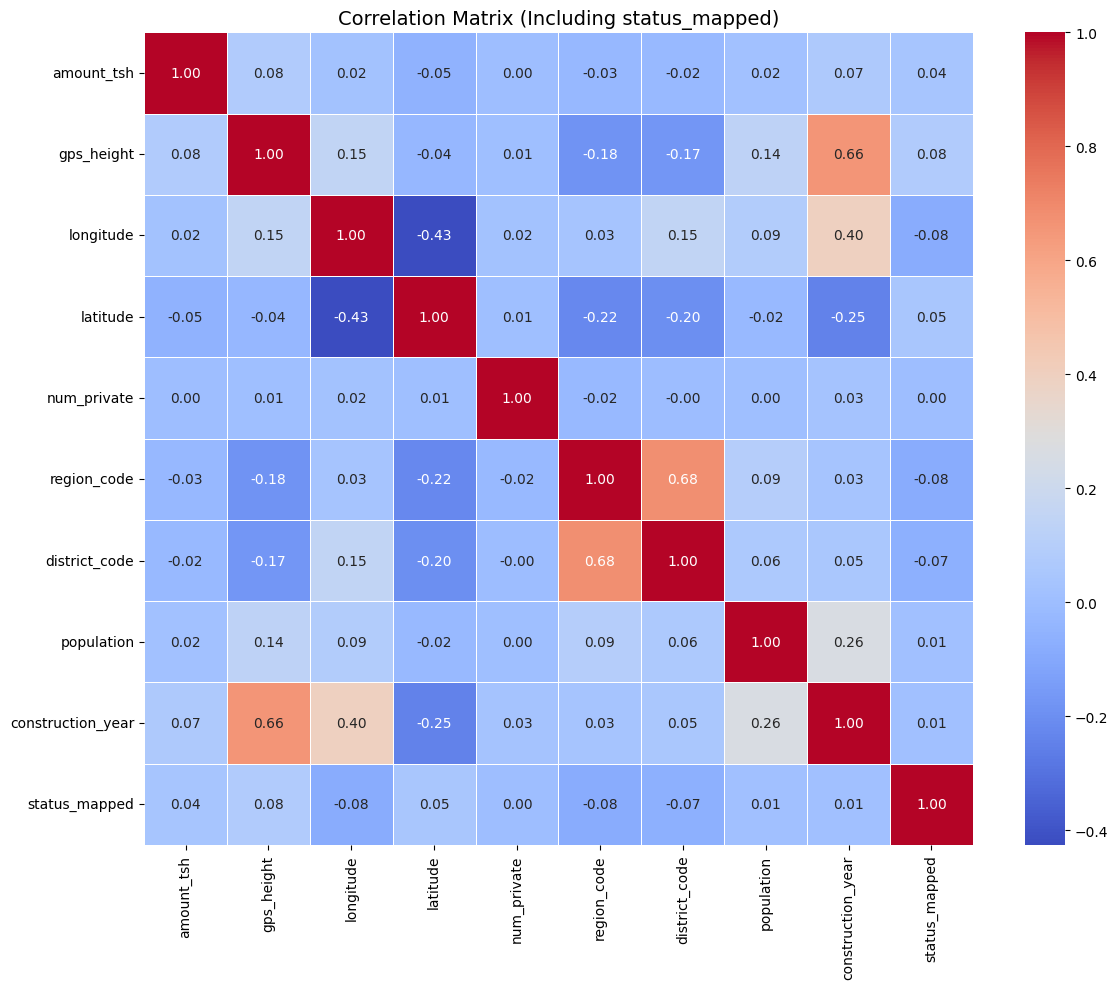

In [29]:


# Compute correlation matrix 

corr_matrix = df_train[corr_cols].corr()

# Plot heatmap with status_mapped 
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Matrix (Including status_mapped)", fontsize=14)
plt.tight_layout()
plt.show()

## Identify Potentially Redundant Features

To correctly identify, use columns created in data cleaning 

In [30]:
# Data cleaning 'construction_year'

# Replace 0s with NaN temporarily for processing
df_train['construction_year_cleaned'] = df_train['construction_year'].replace(0, np.nan)

#Compute mean construction year by region (ignoring NaNs)
region_means = df_train.groupby('region')['construction_year_cleaned'].mean()

region_means

region
Arusha           1998.808427
Dar es Salaam    2001.040609
Dodoma                   NaN
Iringa           1997.441284
Kagera                   NaN
Kigoma           1998.029223
Kilimanjaro      1996.543278
Lindi            1994.842289
Manyara          2002.114013
Mara             1997.454918
Mbeya                    NaN
Morogoro         1996.025326
Mtwara           1992.373707
Mwanza           1994.050704
Pwani            2002.857666
Rukwa            1989.858804
Ruvuma           1997.446265
Shinyanga        2002.621951
Singida          1994.338129
Tabora                   NaN
Tanga            1992.623318
Name: construction_year_cleaned, dtype: float64

In [31]:
# Filter to focus on the regions of interest: Dodoma, Kagera, Mbeya, Tabora

regions_of_interest = ['Dodoma', 'Kagera', 'Mbeya', 'Tabora']
filtered_region_df = df_train[df_train['region'].isin(regions_of_interest)]

filtered_region_df



,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_mapped,construction_year_cleaned
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,1,NaN
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,0,NaN
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,NaN
27,20145,0.0,2011-07-11,Hesawa,0,DWE,31.104257,-1.735361,Kwawilliam,0,...,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,NaN
30,46804,0.0,2011-03-23,Water,0,Water,36.108312,-5.791000,Ngosi,0,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59384,72148,0.0,2011-07-10,Concern,0,CONCERN,30.667805,-2.483710,Chamkube,0,...,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,0,NaN
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,0,NaN
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,...,insufficient,insufficient,dam,dam,surface,other,other,functional,1,NaN
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,1,NaN


In [32]:
unique_values = filtered_region_df['construction_year'].unique()

unique_values

array([0], dtype=int64)

In [37]:
# Finding the earliest construction year excluding 0

earliest_construction_year = df_train[df_train['construction_year'] != 0]['construction_year'].min()

print("The earliest construction year excluding 0 is:", earliest_construction_year)

The earliest construction year excluding 0 is: 1960
